In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random

In [2]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Load the data into PyTorch DataLoader
mnist_train = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
mnist_test = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)




In [3]:
# Define the DNN model
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [4]:
model = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(100):
    running_loss = 0.0
    running_correct = 0
    model.train()
    for i, data in enumerate(mnist_train, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        
    train_loss = (running_loss / len(mnist_train))
    train_losses.append(train_loss)
    train_accuracy = (running_correct / len(mnist_train.dataset))
    train_accuracies.append(train_accuracy)
    
    test_loss = 0.0
    test_correct = 0
    with torch.no_grad():
        for data in mnist_test:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            test_correct += (predicted == labels).sum().item()
    test_loss /= len(mnist_test)
    test_losses.append(test_loss)
    test_accuracy = test_correct / len(mnist_test.dataset)
    test_accuracies.append(test_accuracy)
    #print(epoch, train_loss, train_accuracy, test_loss, test_accuracy)
    #print(train_losses)
    #print(train_accuracies)
    #print(test_losses)
    #print(test_accuracies)

In [8]:
#print(train_losses)
#print(train_accuracies)
#print(test_losses)
#print(test_accuracies)

[2.300870646337035, 2.3014750146562126, 2.301163406129096, 2.3019207116145237, 2.3022436366719043, 2.3022587891596897, 2.302548903568535, 2.302354730618228, 2.3025939069735775, 2.3022991259386587, 2.3031103778037294, 2.3036299025177196, 2.3041098133014266, 2.305689371315537, 2.3035119627691376, 2.302725310538225, 2.3072414793026677, 2.3044212471907306, 2.304116407017799, 2.305852841419779, 2.305206459798631, 2.30600160702019, 2.3078695892528365, 2.3126965282828946, 2.3165431387105566, 2.3092624032573337, 2.303649584958508, 2.3084045838398537, 2.299491581643463, 2.3198456475689153, 2.336323446528927, 2.326654132004756, 2.33575912493809, 2.33441564991216, 2.3333562771985483, 2.309055902396038, 2.343192574324881, 2.3355216220685633, 2.327637777207004, 2.347026566790927, 2.3262815581765146, 2.380702528983924, 2.347470104314719, 2.365507810738436, 2.415266079507816, 2.360513848104295, 2.3956382502416136, 2.3545956353473056, 2.455278229561581, 2.441994015578252, 2.465766476977403, 2.43553550

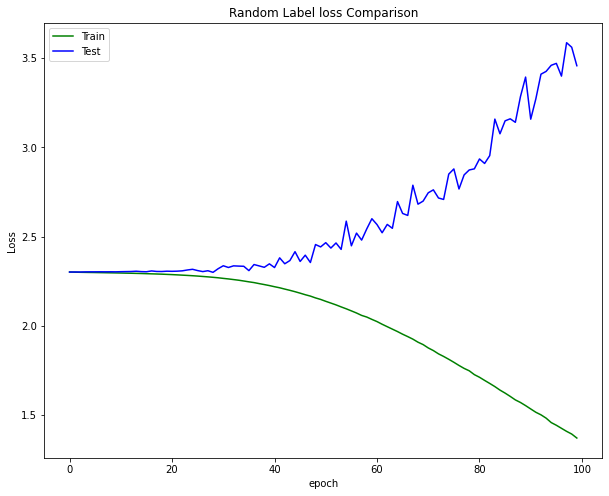

In [12]:
import numpy as np
plt.figure(figsize=(10,8))
plt.plot(np.arange(0, 100, 1), train_losses, color = "g")
plt.plot(np.arange(0, 100, 1), test_losses, color = "b")
plt.title('Random Label loss Comparison')
plt.legend(['Train', 'Test'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()



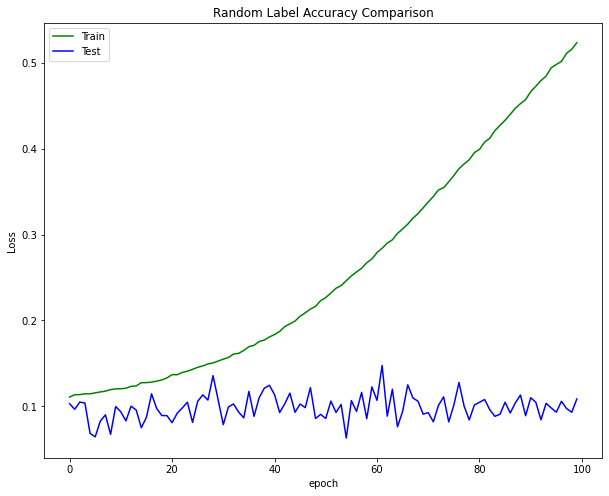

In [13]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(0, 100, 1), train_accuracies, color = "g")
plt.plot(np.arange(0, 100, 1), test_accuracies, color = "b")
plt.title('Random Label Accuracy Comparison')
plt.legend(['Train', 'Test'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()